In [1]:
import boxmodel
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
test_run = boxmodel.run_model("params.yml", 1, 365*25)

In [3]:
test_run

<xarray.Dataset> Size: 657kB
Dimensions:  (depth: 2, time: 9125)
Coordinates:
  * depth    (depth) int64 16B 0 -1
  * time     (time) int64 73kB 0 1 2 3 4 5 6 ... 9119 9120 9121 9122 9123 9124
Data variables:
    NO3_14   (depth, time) float64 146kB 10.7 10.71 10.72 ... 18.73 18.73 18.73
    NO3_15   (depth, time) float64 146kB 0.03961 0.03965 ... 0.06978 0.06978
    N2O_14   (depth, time) float64 146kB 0.0063 0.006352 ... 0.01839 0.01839
    N2O_15   (depth, time) float64 146kB 2.331e-05 2.35e-05 ... 6.776e-05

# Tracer plots

In [4]:
R15_AIR = 0.00367647

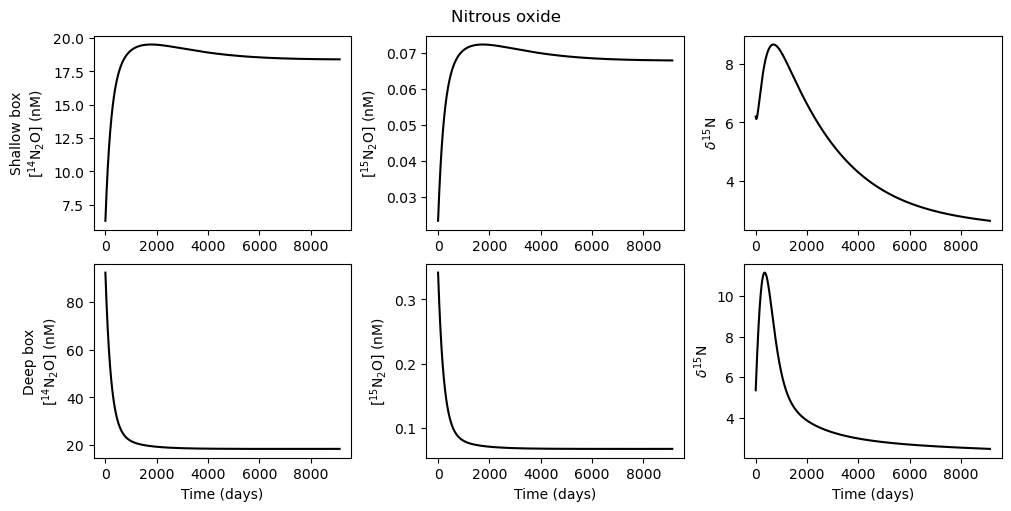

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(10, 5), layout="constrained")
ax[0,0].plot(test_run.time, test_run.N2O_14.sel({"depth": 0})*1000, "k")
ax[0,0].set_ylabel("Shallow box\n[$^{14}$N$_2$O] (nM)" )

ax[0,1].plot(test_run.time, test_run.N2O_15.sel({"depth": 0})*1000, "k")
ax[0,1].set_ylabel("[$^{15}$N$_2$O] (nM)" )

ax[0,2].plot(test_run.time, (((test_run.N2O_15.sel({"depth": 0})/test_run.N2O_14.sel({"depth": 0}))/R15_AIR) -1 )*1000, "k")
ax[0,2].set_ylabel(r"$\delta ^{15}$N")

ax[1,0].plot(test_run.time, test_run.N2O_14.sel({"depth": -1})*1000,"k")
ax[1,0].set_ylabel("Deep box\n[$^{14}$N$_2$O] (nM)" )
ax[1,0].set_xlabel("Time (days)")

ax[1,1].plot(test_run.time, test_run.N2O_15.sel({"depth": -1})*1000,"k")
ax[1,1].set_ylabel("[$^{15}$N$_2$O] (nM)" )
ax[1,1].set_xlabel("Time (days)")

ax[1,2].plot(test_run.time, (((test_run.N2O_15.sel({"depth": -1})/test_run.N2O_14.sel({"depth": -1}))/R15_AIR) -1 )*1000, "k")
ax[1,2].set_ylabel(r"$\delta ^{15}$N")
ax[1,2].set_xlabel("Time (days)")

plt.suptitle("Nitrous oxide")

plt.savefig("N2O_concs.png")

plt.show()

In [6]:
delta_shallow = (((test_run.N2O_15.sel({"depth": 0})/test_run.N2O_14.sel({"depth": 0}))/R15_AIR) -1 )*1000
delta_deep = (((test_run.N2O_15.sel({"depth": -1})/test_run.N2O_14.sel({"depth": -1}))/R15_AIR) -1 )*1000

print(delta_shallow.isel({"time":-1}).values)
print(delta_deep.isel({"time":-1}).values)

2.6230593968883387
2.446162036227495


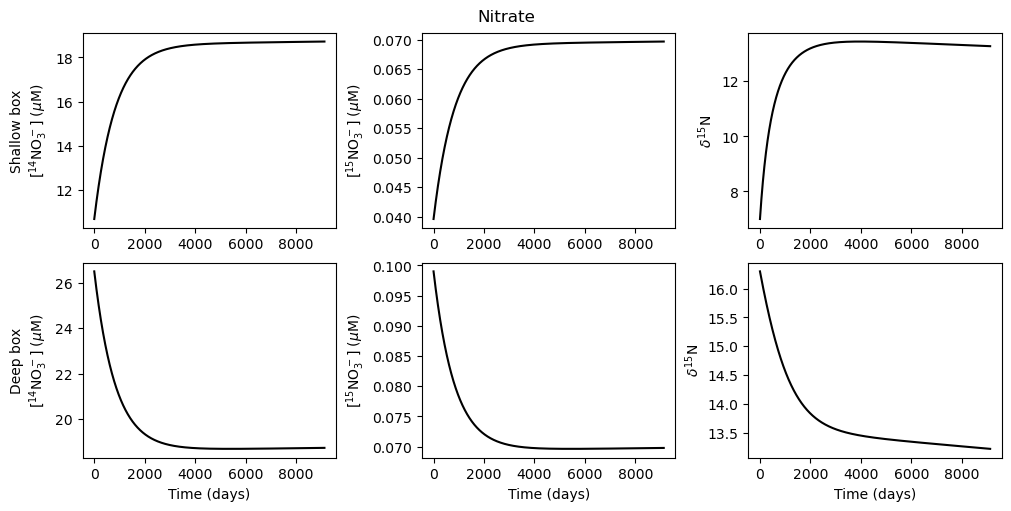

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(10, 5), layout="constrained")
ax[0,0].plot(test_run.time, test_run.NO3_14.sel({"depth": 0}),"k")
ax[0,0].set_ylabel("Shallow box\n" + r"[$^{14}$NO$_3^-$] ($\mu$M)" )

ax[0,1].plot(test_run.time, test_run.NO3_15.sel({"depth": 0}),"k")
ax[0,1].set_ylabel(r"[$^{15}$NO$_3^-$] ($\mu$M)" )

ax[0,2].plot(test_run.time, (((test_run.NO3_15.sel({"depth": 0})/test_run.NO3_14.sel({"depth": 0}))/R15_AIR) -1 )*1000, "k")
ax[0,2].set_ylabel(r"$\delta ^{15}$N")

ax[1,0].plot(test_run.time, test_run.NO3_14.sel({"depth": -1}),"k")
ax[1,0].set_ylabel("Deep box\n" + r"[$^{14}$NO$_3^-$] ($\mu$M)" )
ax[1,0].set_xlabel("Time (days)")

ax[1,1].plot(test_run.time, test_run.NO3_15.sel({"depth": -1}),"k")
ax[1,1].set_ylabel(r"[$^{15}$NO$_3^-$] ($\mu$M)" )
ax[1,1].set_xlabel("Time (days)")

ax[1,2].plot(test_run.time, (((test_run.NO3_15.sel({"depth": -1})/test_run.NO3_14.sel({"depth": -1}))/R15_AIR) -1 )*1000, "k")
ax[1,2].set_ylabel(r"$\delta ^{15}$N")
ax[1,2].set_xlabel("Time (days)")

plt.suptitle("Nitrate")

plt.savefig("NO3_concs.png")

plt.show()

In [8]:
delta_shallow = (((test_run.NO3_15.sel({"depth": 0})/test_run.NO3_14.sel({"depth": 0}))/R15_AIR) -1 )*1000
delta_deep = (((test_run.NO3_15.sel({"depth": -1})/test_run.NO3_14.sel({"depth": -1}))/R15_AIR) -1 )*1000

print(delta_shallow.isel({"time":-1}).values)
print(delta_deep.isel({"time":-1}).values)

13.275586269505535
13.218250627343053
